In [261]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import seaborn as sns
from category_encoders.polynomial import PolynomialEncoder
from patsy import dmatrix, demo_data, ContrastMatrix, Poly

In [9]:
genes = pd.read_csv("Table_genotypes_RaulVicente.csv")
cortical_thickness = pd.read_csv("cortical_thickness_by_subject.csv")

In [13]:
cortical_thickness.shape

(257, 149)

In [8]:
genes.describe(include = 'all')

,case,sex,age,apoe,bin1,clu,abca7,cr1,picalm
count,257,257,257.000000,257,257,257,257,257,257
unique,257,2,NaN,4,3,3,3,3,3
top,s_080,F,NaN,E3/E3,A/A,C/T,T/T,G/G,C/T
freq,1,131,NaN,171,126,123,190,164,124
mean,NaN,NaN,66.735409,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,5.326088,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,53.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,63.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,67.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,70.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
cortical_thickness.describe()

,left_G_and_S_frontomargin,left_G_and_S_occipital_inf,left_G_and_S_paracentral,left_G_and_S_subcentral,left_G_and_S_transv_frontopol,left_G_and_S_cingul.Ant,left_G_and_S_cingul.Mid.Ant,left_G_and_S_cingul.Mid.Post,left_G_cingul.Post.dorsal,left_G_cingul.Post.ventral,...,right_S_orbital.H_Shaped,right_S_parieto_occipital,right_S_pericallosal,right_S_postcentral,right_S_precentral.inf.part,right_S_precentral.sup.part,right_S_suborbital,right_S_subparietal,right_S_temporal_inf,right_S_temporal_sup
count,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,...,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,2.184553,2.279475,2.241401,2.469786,2.329650,2.448152,2.457444,2.414506,2.789366,2.371432,...,2.375598,2.023043,2.031520,2.011602,2.287969,2.222313,2.290102,2.208313,2.337848,2.321805
std,0.167495,0.174433,0.225445,0.153330,0.230787,0.176378,0.156216,0.128482,0.188774,0.282086,...,0.182996,0.154685,0.284228,0.171176,0.139453,0.191868,0.305826,0.169001,0.186310,0.116335
min,1.775000,1.765000,1.402000,2.062000,1.660000,2.039000,2.060000,2.108000,2.314000,1.469000,...,1.736000,1.512000,1.314000,1.436000,1.694000,1.530000,1.603000,1.665000,1.878000,1.947000
25%,2.069000,2.174000,2.115000,2.375000,2.165000,2.325000,2.348000,2.325000,2.646000,2.198000,...,2.268500,1.925750,1.833750,1.928000,2.211750,2.126750,2.098750,2.103750,2.227000,2.264750
50%,2.182000,2.279000,2.271000,2.464000,2.308000,2.435000,2.454000,2.409000,2.787000,2.373000,...,2.368000,2.032500,2.007500,2.002500,2.300500,2.246500,2.248500,2.187000,2.324000,2.320000
75%,2.287000,2.393000,2.389000,2.575000,2.485000,2.572000,2.556000,2.494000,2.918000,2.553000,...,2.479000,2.137250,2.186250,2.111000,2.378000,2.347250,2.430000,2.313250,2.443000,2.399000
max,2.665000,2.727000,2.861000,2.972000,3.264000,3.158000,2.864000,2.789000,3.231000,3.316000,...,3.102000,2.377000,3.135000,2.738000,2.593000,2.611000,3.647000,2.716000,2.918000,2.630000


In [368]:
avg_thickness = cortical_thickness.mean(axis=1)
genes_dummies = pd.get_dummies(genes.drop(["case", "sex", "age"], axis = 1))
#genes_dummies["age"] = genes.age

In [249]:
genes_dummies.head()

,apoe_E2/E3,apoe_E3/E3,apoe_E3/E4,apoe_E4/E4,bin1_A/A,bin1_A/G,bin1_G/G,clu_C/C,clu_C/T,clu_T/T,abca7_G/G,abca7_G/T,abca7_T/T,cr1_A/A,cr1_A/G,cr1_G/G,picalm_C/C,picalm_C/T,picalm_T/T
0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0
1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1
2,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0
3,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0


In [276]:
X_train, X_test, y_train, y_test = train_test_split(genes_dummies, avg_thickness, test_size=0.33)

In [277]:
LR = LinearRegression()
LR.fit(X_train, y_train)
pred = LR.predict(X_test)

In [278]:
mean_squared_error(y_test, pred)

0.009900655973734587

In [279]:
r2_score(y_test, pred)

-0.03864890399736365

In [255]:
LR.coef_

array([ 0.07195091,  0.07874181,  0.04561624, -0.19630896,  0.00614979,
        0.00317827, -0.00932806, -0.0056671 , -0.00443522,  0.01010232,
        0.0713747 , -0.04140425, -0.02997045, -0.00414846, -0.00031406,
        0.00446252, -0.00244508, -0.00933134,  0.01177643])

In [382]:
LR = LinearRegression()
scores = cross_val_score(LR, genes_dummies, avg_thickness, cv=5, scoring='neg_mean_squared_error')

left_S_circular_insula_inf and picalm gene result doesn't change with increasing the amunt of data

In [383]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: -0.01 (+/- 0.01)


In [201]:
from itertools import chain, combinations

def powerset(iterable):
    """
    powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)
    """
    xs = list(iterable)
    # note we return an iterator rather than a list
    return chain.from_iterable(combinations(xs,n) for n in range(len(xs)+1))

In [384]:
after = []
k = list(powerset(set([3,4,5, 6, 7, 8])))
k.pop(0)
for i in range(len(k)):
    l = list(itertools.chain.from_iterable([k[i]]))

    genes_dummies = pd.get_dummies(genes.iloc[0:257, l])
    LR = LinearRegression()
    scores = cross_val_score(LR, genes_dummies, avg_thickness, cv=10, scoring='neg_mean_squared_error')
    #print(list(genes.iloc[0:158, l]))
    #print(np.mean(scores))
    #print(scores)
    after.append(np.mean(scores))

In [313]:
print(np.mean(before))
print(np.min(before))
print(np.max(before))
print(np.mean(after_a))
print(np.min(after_a))
print(np.max(after_a))

-0.014615185501018597
-0.015899256925720237
-0.013343592228043297
-0.0111349228907942
-0.01214361379901105
-0.010392008818586729


In [316]:
print(np.argmax(before))

print(np.argmax(after_a))

5
5


In [318]:
print(k[5])

('abca7',)


In [386]:
#after = []
before = []
k = list(powerset(set(["apoe", "bin1", "clu", "abca7", "cr1", "picalm"])))
k.pop(0)
x = []
for i in range(len(k)):
    l = list(itertools.chain.from_iterable([k[i]]))
    x.append(l)
    genes_dummies = pd.get_dummies(genes[l].iloc[0:159])
    LR = LinearRegression()
    scores = cross_val_score(LR, genes_dummies, avg_thickness.iloc[0:159], cv=10, scoring='neg_mean_squared_error')
    #print(list(genes.iloc[0:158, l]))
    #print(np.mean(scores))
    #print(scores)
    before.append(np.mean(scores))

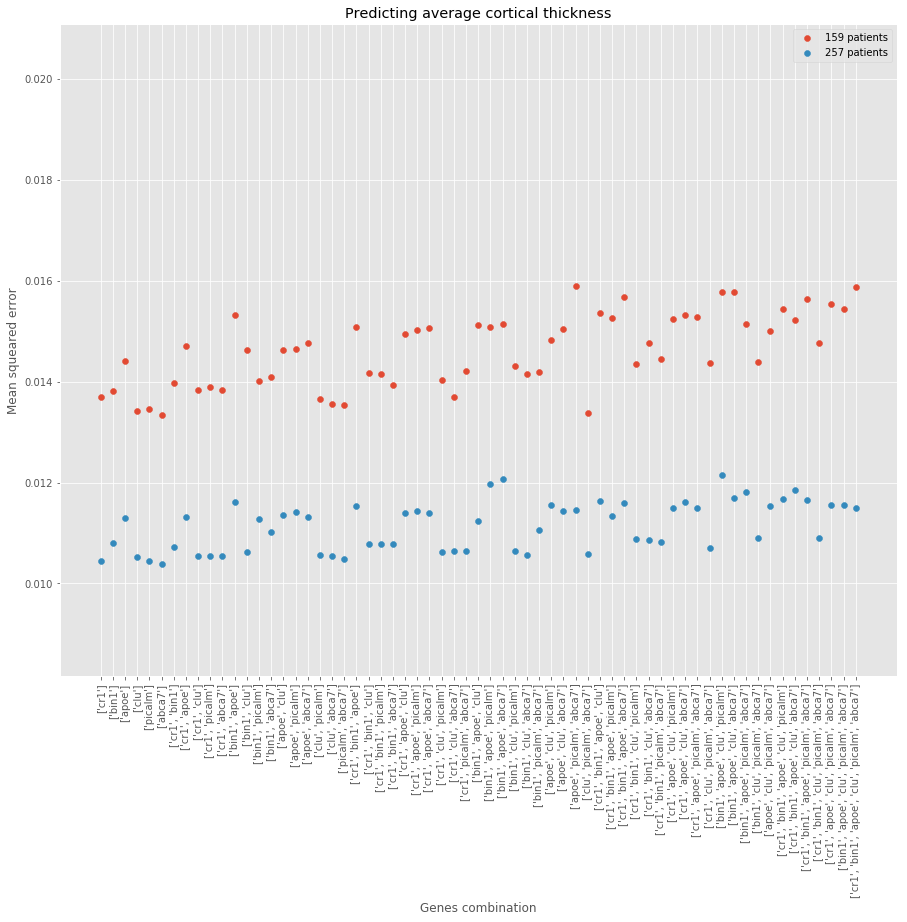

In [391]:
plt.style.use('ggplot')
plt.figure(figsize=(15,12))
plt.scatter(np.arange(len(before)), np.negative(before), label = "159 patients")
plt.scatter(np.arange(len(before)), np.negative(after), label = "257 patients")
plt.xticks(np.arange(len(x)), x, rotation=90)
plt.ylabel("Mean squeared error")
plt.xlabel("Genes combination")
plt.legend()
plt.title("Predicting average cortical thickness")
plt.show()

In [299]:
after = []
#before = []
k = list(powerset(set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])))
k.pop(0)
for i in range(len(k)):
    l = list(itertools.chain.from_iterable([k[i]]))
    LR = LinearRegression()
    scores = cross_val_score(LR, genes_dummies.iloc[:, l], avg_thickness, cv=10, scoring='neg_mean_squared_error')
    after.append(np.mean(scores))

KeyboardInterrupt: 

In [304]:
after_long = after
print(np.mean(after))
print(np.min(after))
print(np.max(after))

-0.010994492415004966
-0.030671979120381065
-0.010202663465182036


In [319]:
np.argmax(after)

60270

In [321]:
k[60270]

(0, 5, 8, 10, 11, 12, 18)

Now let's try the polynmial coding of each categorical feature

In [ ]:
apoe	bin1	clu	abca7	cr1	picalm

In [345]:
picalm_poly = dmatrix("C(picalm, Poly)", genes)
LR = LinearRegression()
scores = cross_val_score(LR, np.asarray(picalm_poly), avg_thickness, cv=5, scoring='neg_mean_squared_error')
np.mean(scores)

-0.010528368617215931

https://www.statsmodels.org/dev/contrasts.html

In [352]:
genes_avg_thickness = genes[['apoe', 'bin1', 'clu', 'abca7', 'cr1', 'picalm']].copy()
genes_avg_thickness['avg_thickness'] = avg_thickness

In [353]:
genes_avg_thickness.head()

,apoe,bin1,clu,abca7,cr1,picalm,avg_thickness
0,E3/E4,A/G,C/C,T/T,G/G,C/T,1.966456
1,E2/E3,A/G,C/C,T/T,G/G,T/T,2.305211
2,E3/E3,A/G,C/C,G/T,A/G,C/T,2.147218
3,E2/E3,A/G,C/C,T/T,G/G,C/T,2.311701
4,E3/E3,A/G,C/T,T/T,G/G,C/C,2.299340


In [364]:
from patsy.contrasts import Treatment
levels = ['E2/E3','E3/E3','E3/E4','E4/E4']
contrast = Treatment(reference=0).code_without_intercept(levels)

In [365]:
from statsmodels.formula.api import ols
mod = ols("avg_thickness ~ C(apoe, Treatment)", data=genes_avg_thickness)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          avg_thickness   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.018
Date:                Sun, 06 Jan 2019   Prob (F-statistic):              0.385
Time:                        21:04:53   Log-Likelihood:                 230.49
No. Observations:                 257   AIC:                            -453.0
Df Residuals:                     253   BIC:                            -438.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [367]:
from patsy.contrasts import Poly
levels = genes_avg_thickness.apoe.unique().tolist()

contrast = Poly().code_without_intercept(levels)

mod = ols("avg_thickness ~ C(apoe, Poly)", data=genes_avg_thickness)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          avg_thickness   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.018
Date:                Sun, 06 Jan 2019   Prob (F-statistic):              0.385
Time:                        21:07:23   Log-Likelihood:                 230.49
No. Observations:                 257   AIC:                            -453.0
Df Residuals:                     253   BIC:                            -438.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 